## Foreground Extraction Using GrabCut Algorithm


### Image Segmentation:
<br/>
Image editing requires the ability to quickly and easily extract foreground objects from digital images. A foreground object refers to any object of interest in an image. The background of the image refers to all pixels in the image that are not part of the foreground object. The process of separating an image into foreground and background parts is known as **image segmentation**.

**Original Image**
![title](66.png)

**Segmented Image**
![title](67.png)


In order for computers to perform image segmentation the algorithm performing the segmentation needs to use information encapsulated in the digital image to calculate the best segmentation. Computers have no means of intelligently recognising objects, and so many different methods have been developed in order to segment images. The segmentation process in based on various features found in the image.
<br/>
Edge detection and region detection methods are most commonly used to segment images. Boundary information is the edge information in an image which can be gained by noting the difference between the colours of nearby pixels. A large difference in colour will indicate an edge. A region is the area enclosed by an edge, and the colour of neighbouring pixels in a region are similar.
<br/>
Region and edge detection methods are sufficient for segmenting images with clear boundaries, however if the edges of the object to be segmented are fuzzy these methods do not produce satisfactory segmentation results. In order to produce the best segmentation of an image with fuzzy boundaries it is necessary to perform matting. Matting is a technique which smoothes the boundaries of segmented objects, and makes their appearance more natural.
<br/>
Pixels in digital images have individual alpha values. An alpha value is the opacity that a pixels has, and is allowed to vary between 0 and 255. Thus a pixel with an alpha value of 0 will be totally transparent, and an alpha value of 255 will cause the pixel to be totally opaque. Without matting, a segmented object will have all its pixels set to an alpha value of 255. Matting is the process which smoothes the boundaries of objects by setting alpha values along the objects boundary to change smoothly from 0 to 255. In the alpha matte below white represents alpha values of 255, black represents alpha values of 0 and values in between are represented by shades of grey.

**Original Image**
![title](68.jpg)

**Alpha matte after segmentation**
![title](69.gif)

## GrabCut Algorithm
Most segmentation techniques make use of either edge or region information contained in the image in order to perform segmentation. "GrabCut" is an innovative segmentation technique that uses both region and boundary information contained in an image in order to perform segmentation. "GrabCut" also performs image segmentation in a novel way by using graphs to store region and boundary information. A Min-Cut/Max-Flow algorithm, which is a graph cut technique, is used to segment the graph and in doing so segment the image. "GrabCut" also includes a matting technique which is used to calculate the alpha matte for boundaries of segmented regions.

### Working:
GrabCut" is a segmentation technique that uses graph cuts to perform segmentation. Like most segmentation techniques "GrabCut" uses information encapsulated in the image. Most segmentation techniques make use of either edge information or region information in the image. "GrabCut" makes use of both edge and region information. This information is used to create an energy function which, when minimized, produces the best segmentation.
<br/>
In order to perform segmentation a graph is built, where nodes in the graph represent pixels in the image. In addition two special nodes are also created. These are the Sink and Source nodes. Every pixel node in the graph is connected to the Source and Sink node. The Source node represents the foreground of the image, and the Sink node the background. In order to segment the image the Source and Sink nodes must be separated.
<br/>
The energy function is incorporated into the graph as weights between pixel nodes and weights between pixel and Source or Sink nodes. Weights between pixel nodes are determined by edge information in the image. Thus a strong indication of an edge between two pixels (a large difference in pixel colour) results in a very small weight between two pixel nodes. The region information determines the weights between pixels nodes and the Source and Sink nodes. These weights are calculated by determining the probability of the pixel node being part of the background or foreground region.
<br/>
In order for foreground and background regions to be created, some pixels in the image need to be labelled before segmentation as either foreground or background. This is referred to as the **clue marking stage**. Any pixels that are labelled during this stage are set as hard constraints. This means that during the segmentation process, hard labelled pixels cannot change their labelling.
<br/>
A **Min-cut/Max-Flow algorithm**(explained below) is used to segment the graph. This algorithm determines the minimum cost cut that will separate the Source and Sink nodes. The cost of the cut is determined by the sum of all the weights of the links that are cut. Once the Source and Sink nodes are separated, all pixel nodes connected to the Source node become part of the foreground, and the rest become part of the background.
<br/>
The figure below shows the process of labelling an image, creating the graph, and then segmenting the graph to produce a segmentation of the image.
<br/>
A simplified diagram of the "GrabCut" approach:

![title](70.jpg)

#### Extra context for better understanding of the above:
<br/>
<br/>
### Graph theory
Graph theory is the study of graphs. A graph is an
abstract representation of a set of objects, where
several pairs of the objects are connected by links.
It is a mathematical structure and is used to model
pairwise relations between objects from a certain
collection.
<br/>
To give a more mathematical description of a
graph, we introduce some definitions:
In a graph **G = (V, E)**, **V** and **E** denote the set
of vertices and edges of **G**, respectively. A weighted
graph associates a positive label (weight) with every
edge in the graph. A **directed graph G** consists of
a set of vertices **V** and a set of ordered pairs of edges.
An **s-t graph** is a weighted directed graph with two identified nodes, the source **s** and the sink **t**.

### Max-flow min-cut theorem
The **max-flow min-cut theorem** states that in a flow network, the maximum amount of flow passing from the source to the sink is equal to the total weight of the edges in the minimum cut, i.e. the smallest total weight of the edges which if removed would disconnect the source from the sink.
<br/>
#### Definition
Let **N = (V, E)** be a network (directed graph), where **V** denotes the set of vertices and **E** is the set of edges. Let **s ∈ V** and **t ∈ V** be the source and the sink of **N**, respectively.

#### Maximum flow
Definition-The **capacity of an edge** is a mapping **c : E → R+**, denoted by **c(u, v)**. It represents the maximum amount of flow that can pass through an edge.

Definition- A flow is a mapping  **f : E → R+**, denoted **f (u, v)**, subject to the following two constraints:

1. **Capacity Constraint**: (capacity constraint: the flow of an edge cannot exceed its capacity)
![title](71.svg)
2. **Conservation of Flows**: (conservation of flows: the sum of the flows entering a node must equal the sum of the flows exiting a node, except for the source and the sink nodes)
![title](72.svg)

 The **value of flow** is defined by ![title](73.svg) the amount of flow passing from the source to the sink.
 
 
 ## How GrabCut Algorithm Works in OpenCV: 
 *(From documentation)*
 <br/>
 <br/>
 Initially user draws a rectangle around the foreground region (foreground region should be completely inside the rectangle). Then algorithm segments it iteratively to get the best result. Done. But in some cases, the segmentation won't be fine, like, it may have marked some foreground region as background and vice versa. In that case, user need to do fine touch-ups. Just give some strokes on the images where some faulty results are there. Strokes basically says *"Hey, this region should be foreground, you marked it background, correct it in next iteration"* or its opposite for background. Then in the next iteration, you get better results.
<br/>
See the image below. First player and football is enclosed in a blue rectangle. Then some final touchups with white strokes (denoting foreground) and black strokes (denoting background) is made. And we get a nice result.

![title](74.jpg)

Functionality:
 <br/>
 <br/> 
1. User inputs the rectangle. Everything outside this rectangle will be taken as sure background (That is the reason it is mentioned before that your rectangle should include all the objects). Everything inside rectangle is unknown. Similarly any user input specifying foreground and background are considered as hard-labelling which means they won't change in the process.

2. Computer does an initial labelling depeding on the data we gave. It labels the foreground and background pixels (or it hard-labels).

3. Now a Gaussian Mixture Model(GMM) is used to model the foreground and background.

4. Depending on the data we gave, GMM learns and create new pixel distribution. That is, the unknown pixels are labelled either probable foreground or probable background depending on its relation with the other hard-labelled pixels in terms of color statistics (It is just like clustering).

5. A graph is built from this pixel distribution. Nodes in the graphs are pixels. Additional two nodes are added, Source node and Sink node. Every foreground pixel is connected to Source node and every background pixel is connected to Sink node.

6. The weights of edges connecting pixels to source node/end node are defined by the probability of a pixel being foreground/background. The weights between the pixels are defined by the edge information or pixel similarity. If there is a large difference in pixel color, the edge between them will get a low weight.

7. Then a mincut algorithm is used to segment the graph. It cuts the graph into two separating source node and sink node with minimum cost function. The cost function is the sum of all weights of the edges that are cut. After the cut, all the pixels connected to Source node become foreground and those connected to Sink node become background.

8. The process is continued until the classification converges.


**OpenCV has the function, cv2.grabCut() for this. We will see its arguments first:**

**img** - Input image <br/>
**mask** - It is a mask image where we specify which areas are background, foreground or probable  background/foreground etc. It is done by the following flags, cv2.GC_BGD, cv2.GC_FGD, cv2.GC_PR_BGD, cv2.GC_PR_FGD, or simply pass 0,1,2,3 to image.<br/>
**rect** - It is the coordinates of a rectangle which includes the foreground object in the format (x,y,w,h)<br/>
**bdgModel, fgdModel** - These are arrays used by the algorithm internally. You just create two np.float64 type zero arrays of size (1,65).<br/>
**iterCount** - Number of iterations the algorithm should run. <br/>
**mode** - It should be **cv2.GC_INIT_WITH_RECT or cv2.GC_INIT_WITH_MASK** or combined which decides whether we are drawing rectangle or final touchup strokes.<br/>

First let's see with rectangular mode. We load the image, create a similar mask image. We create fgdModel and bgdModel. We give the rectangle parameters. It's all straight-forward. Let the algorithm run for 5 iterations. Mode should be cv2.GC_INIT_WITH_RECT since we are using rectangle. Then run the grabcut. It modifies the mask image. In the new mask image, pixels will be marked with four flags denoting background/foreground as specified above. So we modify the mask such that all 0-pixels and 2-pixels are put to 0 (ie background) and all 1-pixels and 3-pixels are put to 1(ie foreground pixels). Now our final mask is ready. Just multiply it with input image to get the segmented image.
 
##### Gaussian Model Explained later

## Code

Image to be used in the code:
![title](77.jpg)

(595, 948, 3)
MASK after applying GrabCut [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
MASK (mask2) after seperating the background and the foreground part [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


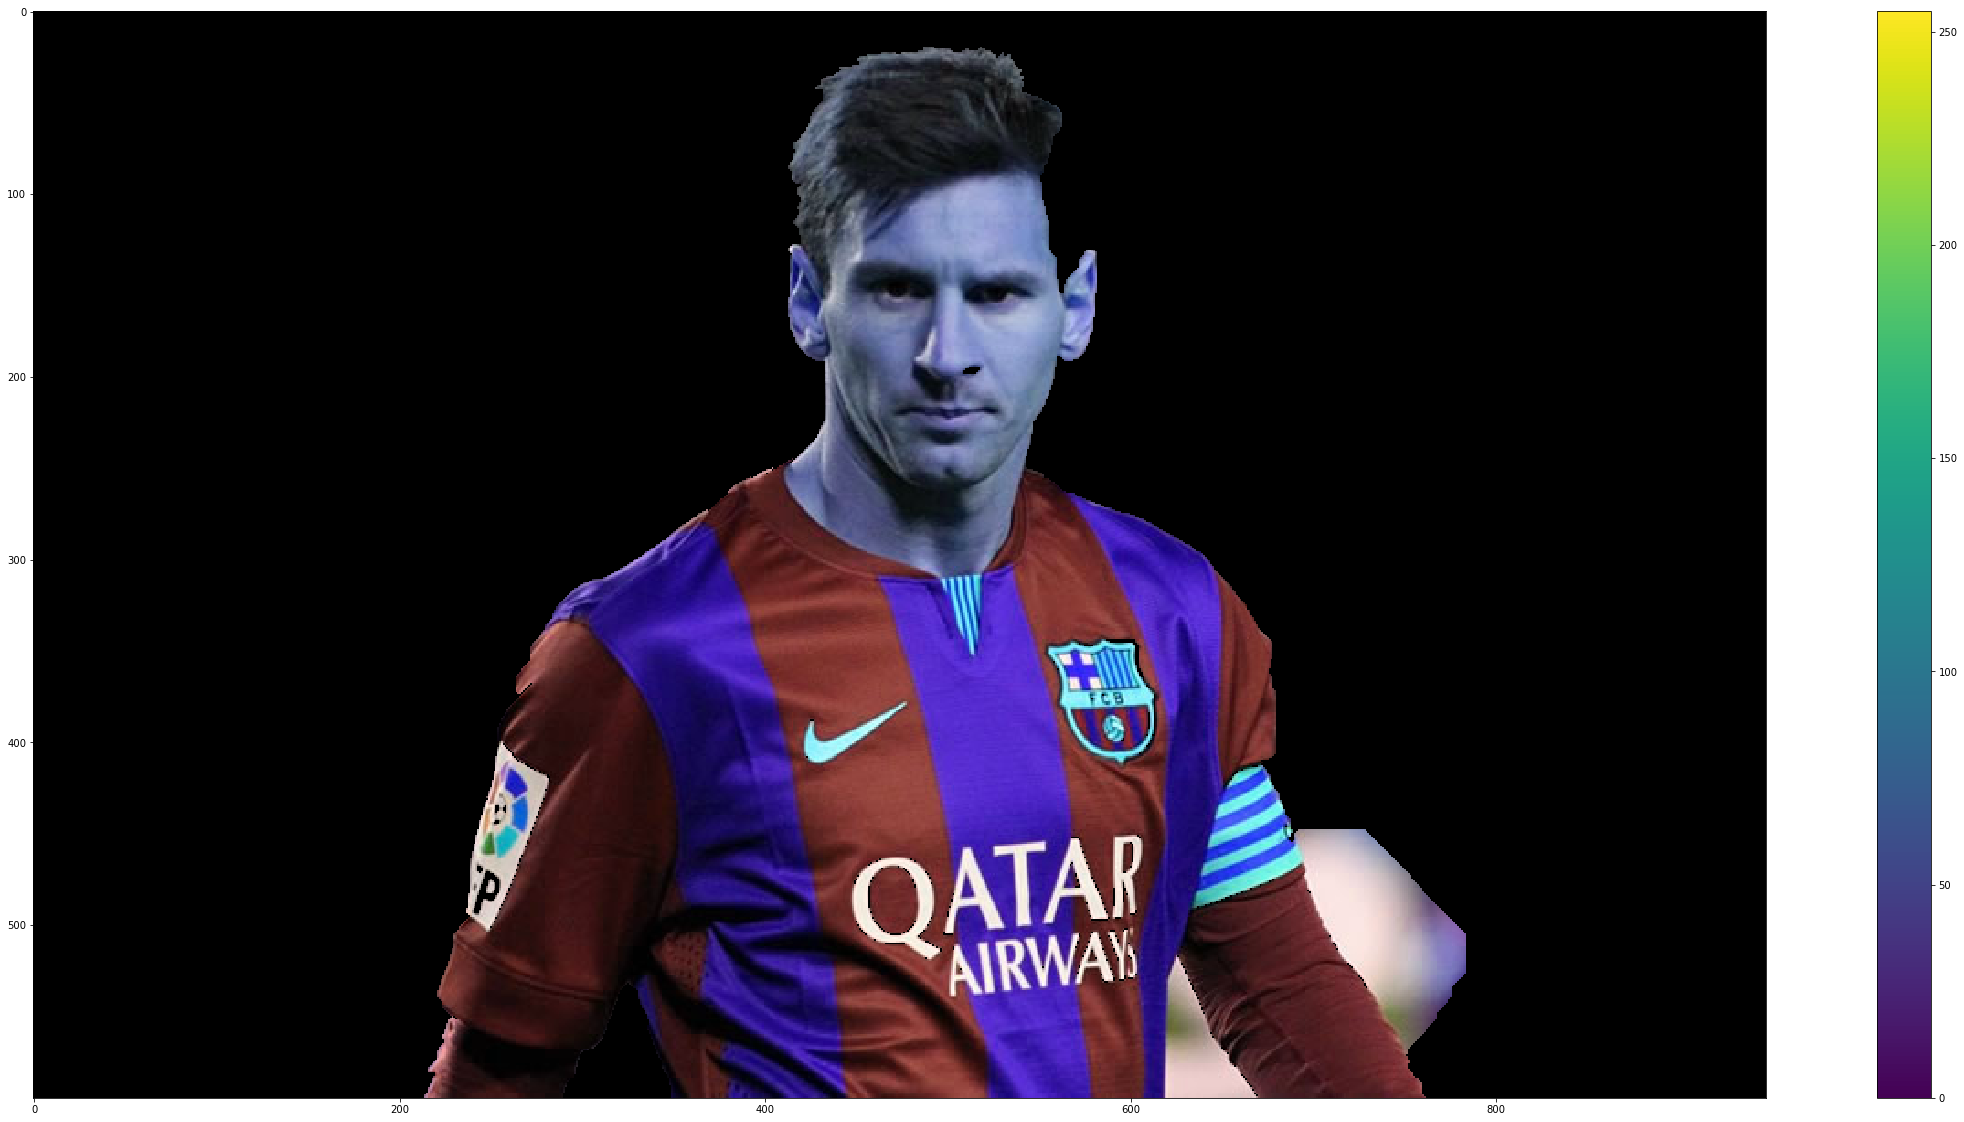

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



img = cv2.imread("77.jpg")      #img.shape = (595, 948, 3)

#taking only channel of the image for further analysis. For syntax, read tuple slicing
mask = np.zeros(img.shape[:2] , np.uint8)   #mask.shape = (595, 948)

print(img.shape)

#By default we take these values, everwhere. These are the parameters given to cv2.grabCut()
bgdModel = np.zeros((1,65) , np.float64) #Background Model
fgdModel = np.zeros((1,65) , np.float64) #Foreground Model



#Starting point, width, height <- Found out manually by plotting a rectangle first, guessing the values
rectangle = (200, 0 , 600 , 595)


cv2.grabCut(img , mask , rectangle , bgdModel , fgdModel , 5 , cv2.GC_INIT_WITH_RECT ) #5 is the number of iterations

print("MASK after applying GrabCut",mask)


#The values of 0 and 2 of pixels in the mask are considered as pixels of the background part of the image
#Filtering mask,  converting all 0,2 values to 0. 
#The other values are 1 , 3 (considered as foreground part of the image) and hence given value of 1
# copy the values of mask to mask2 where condition is if the pixel values are 0 or 2, change it to 0, else place 1 
#and make the mask2 matrix value of integer type (as img matrix values are int and we later have to multiply them)
mask2 = np.where((mask == 0) | (mask == 2) , 0 ,  1).astype('uint8') 

print("MASK (mask2) after seperating the background and the foreground part",mask2)

#multiplying img and mask2, 
#where img has 3rd dimension of number of channels(3) and hence we are bringing mask2 to the same dimension 
img = img*mask2[ : , : , np.newaxis ] 

#To display a bigger figure(plot) in the inline output
width = 40
height = 20
plt.figure(figsize=(width, height))


plt.imshow(img)
plt.colorbar() #To show colobar on the side
plt.show()



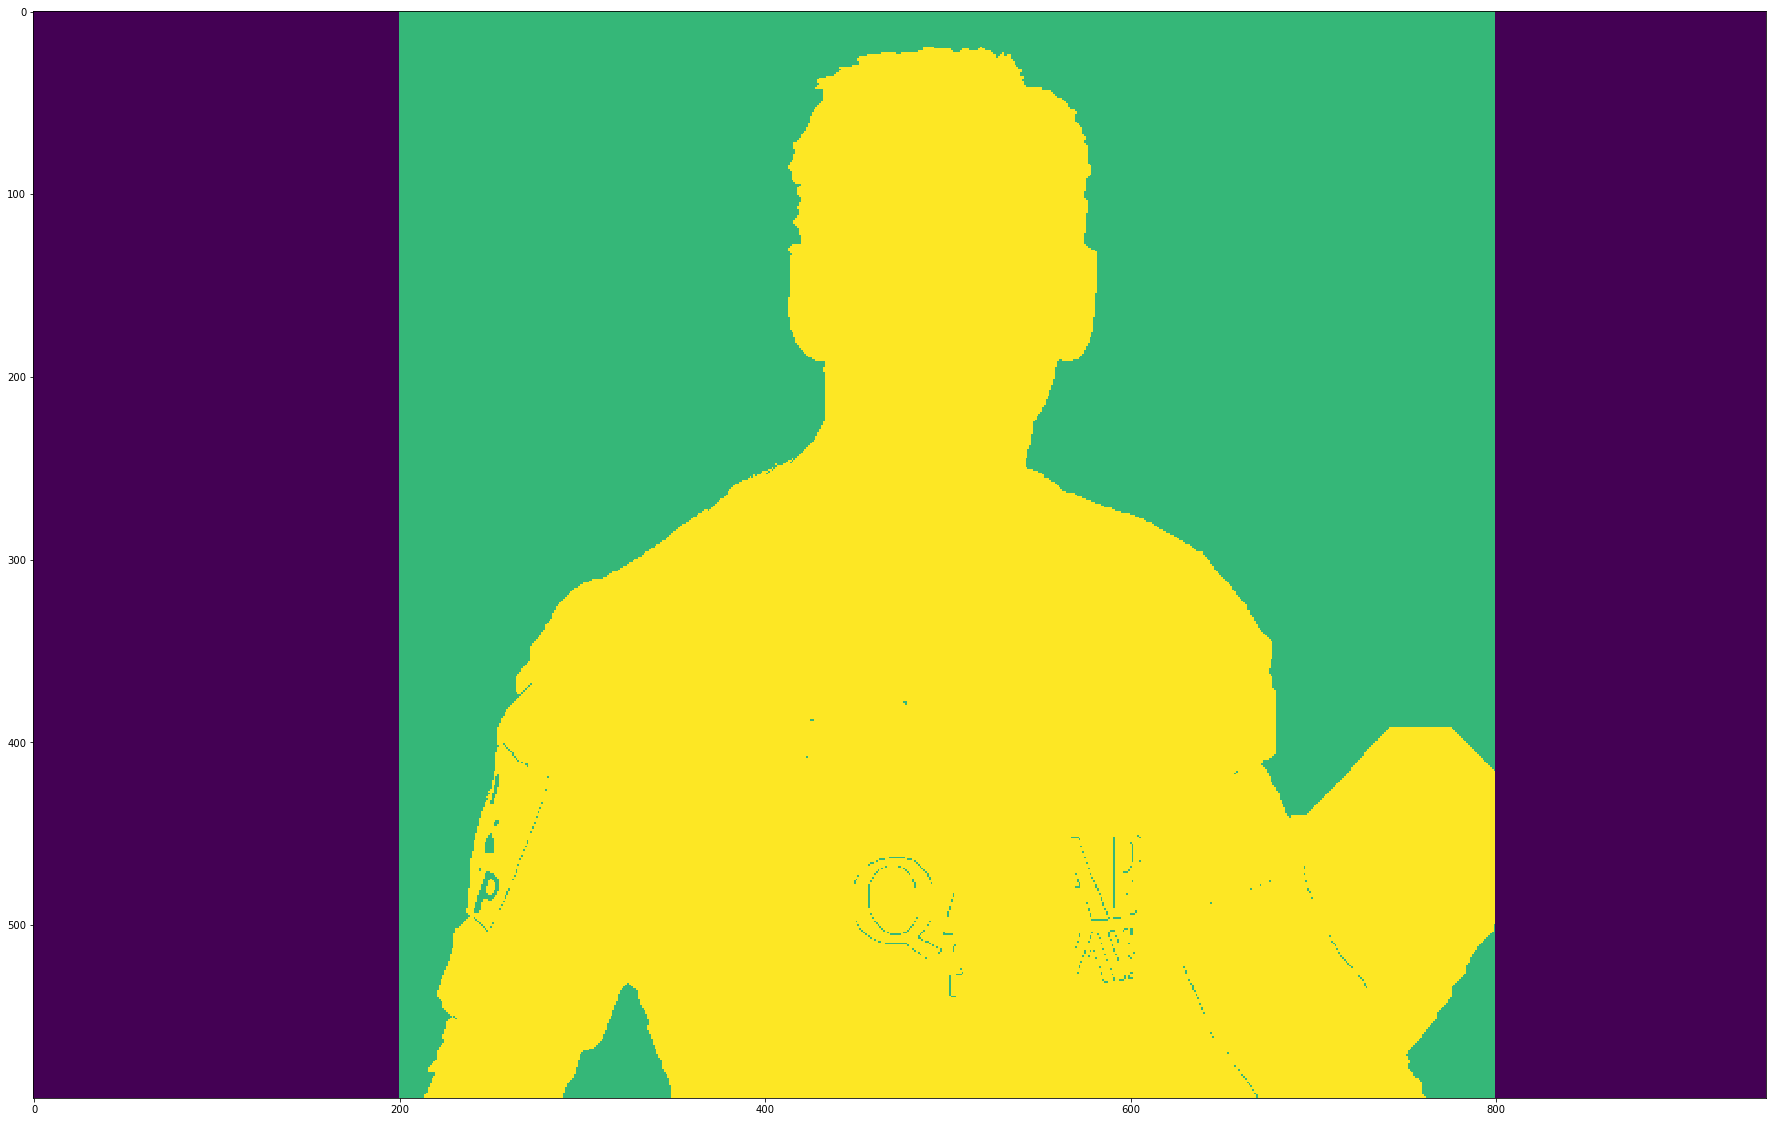

In [8]:
#DISPLAYING THE MASK CREATED IN-BETWEEN CODE  (FOR BETTER VISUALIZATION OF THE CONCEPT ONLY)

#To display a bigger figure in the inline output
width = 40
height = 20
plt.figure(figsize=(width, height))


plt.imshow(mask)

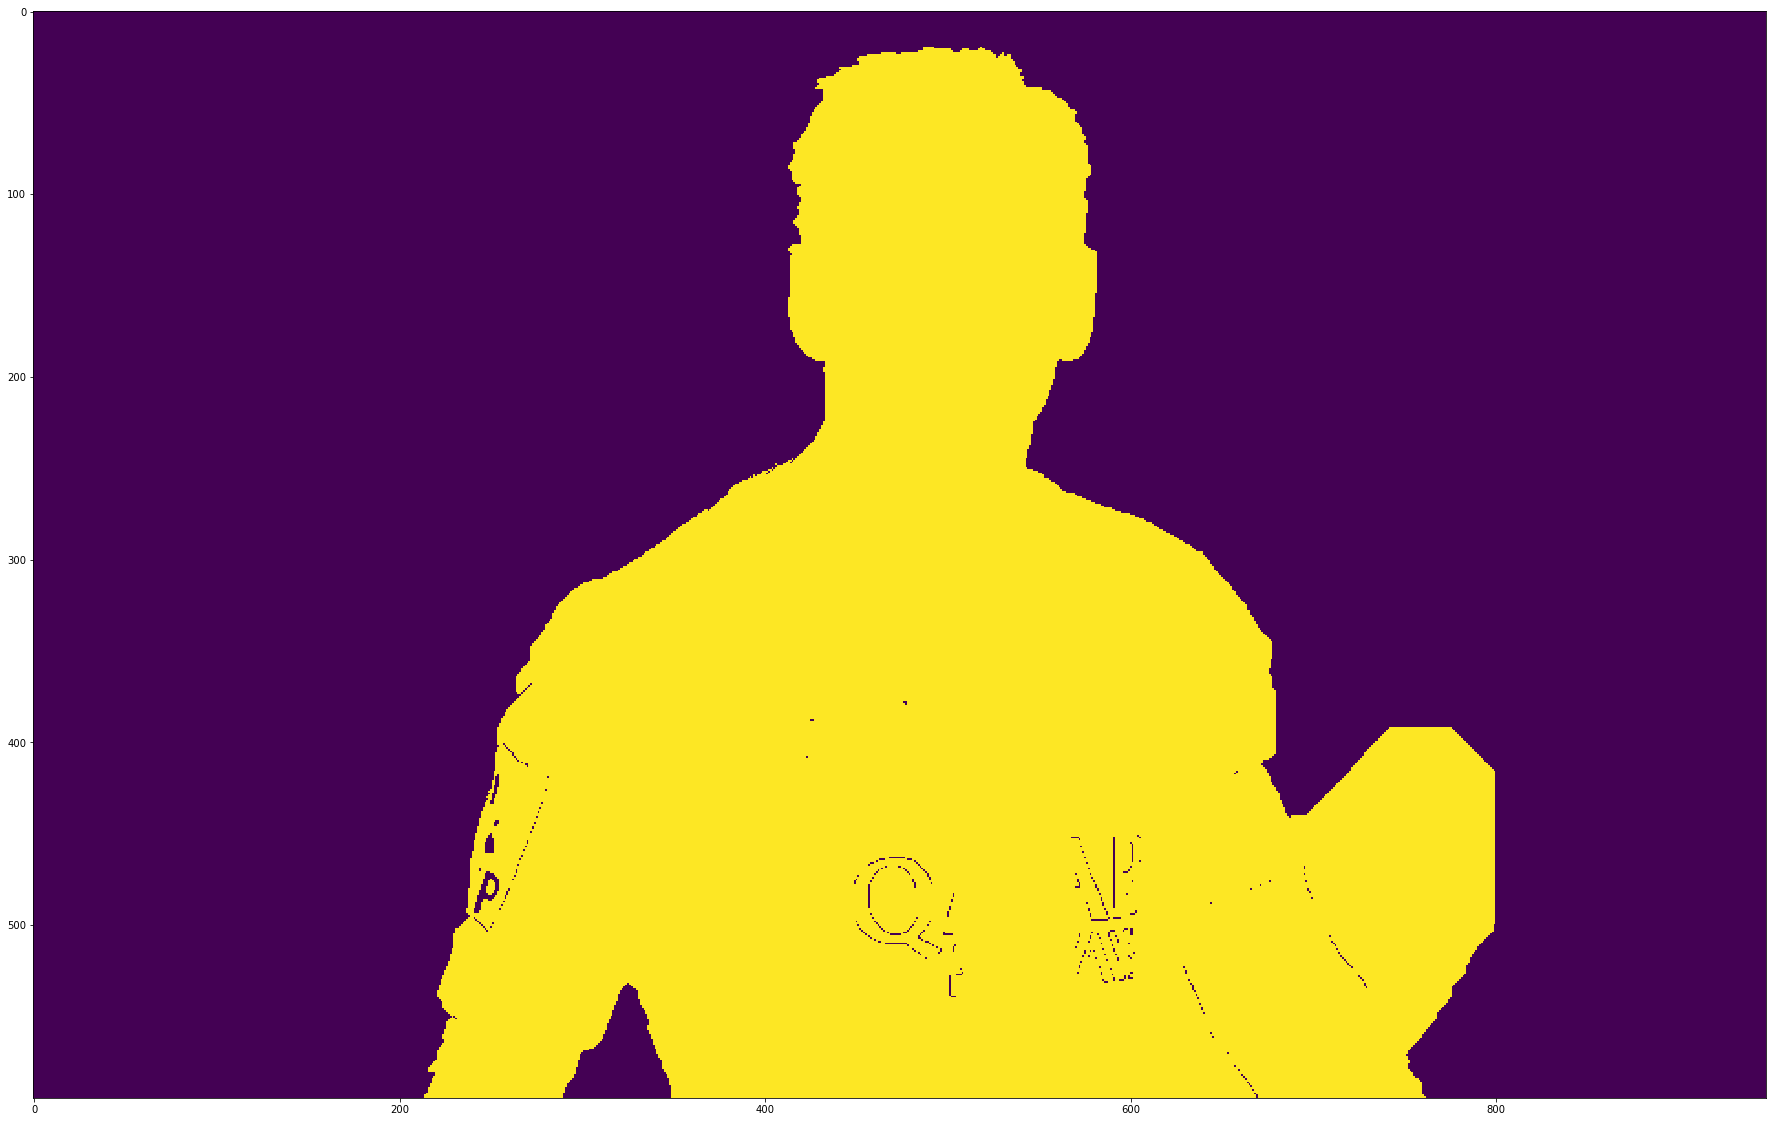

In [9]:
#DISPLAYING THE MASK2 CREATED IN-BETWEEN CODE (FOR BETTER VISUALIZATION OF THE CONCEPT ONLY)

#To display a bigger figure in the inline output
width = 40
height = 20
plt.figure(figsize=(width, height))

plt.imshow(mask2)

### DEFECTS STILL PRESENT: (ANOTHER METHOD)

A lot of part of the background is coming in the foreground like player in the background (XBOX..).Here, we give some 0-pixel touchup (sure background).
Plus, Messi's hair is gone in the background , we need to bring it in the foreground. So we will give there a fine touchup with 1-pixel (sure foreground).
<br/>
<br/>
<br/>
What I actually did is that, I opened input image in paint application and added another layer to the image. Using brush tool in the paint, I marked missed foreground (hair, shoes, ball etc) with white and unwanted background (like logo, ground etc) with black on this new layer. Then filled remaining background with gray. Then loaded that mask image in OpenCV, edited original mask image we got with corresponding values in newly added mask image. Check the code below:
new mask image: 
![title](80.jpg)


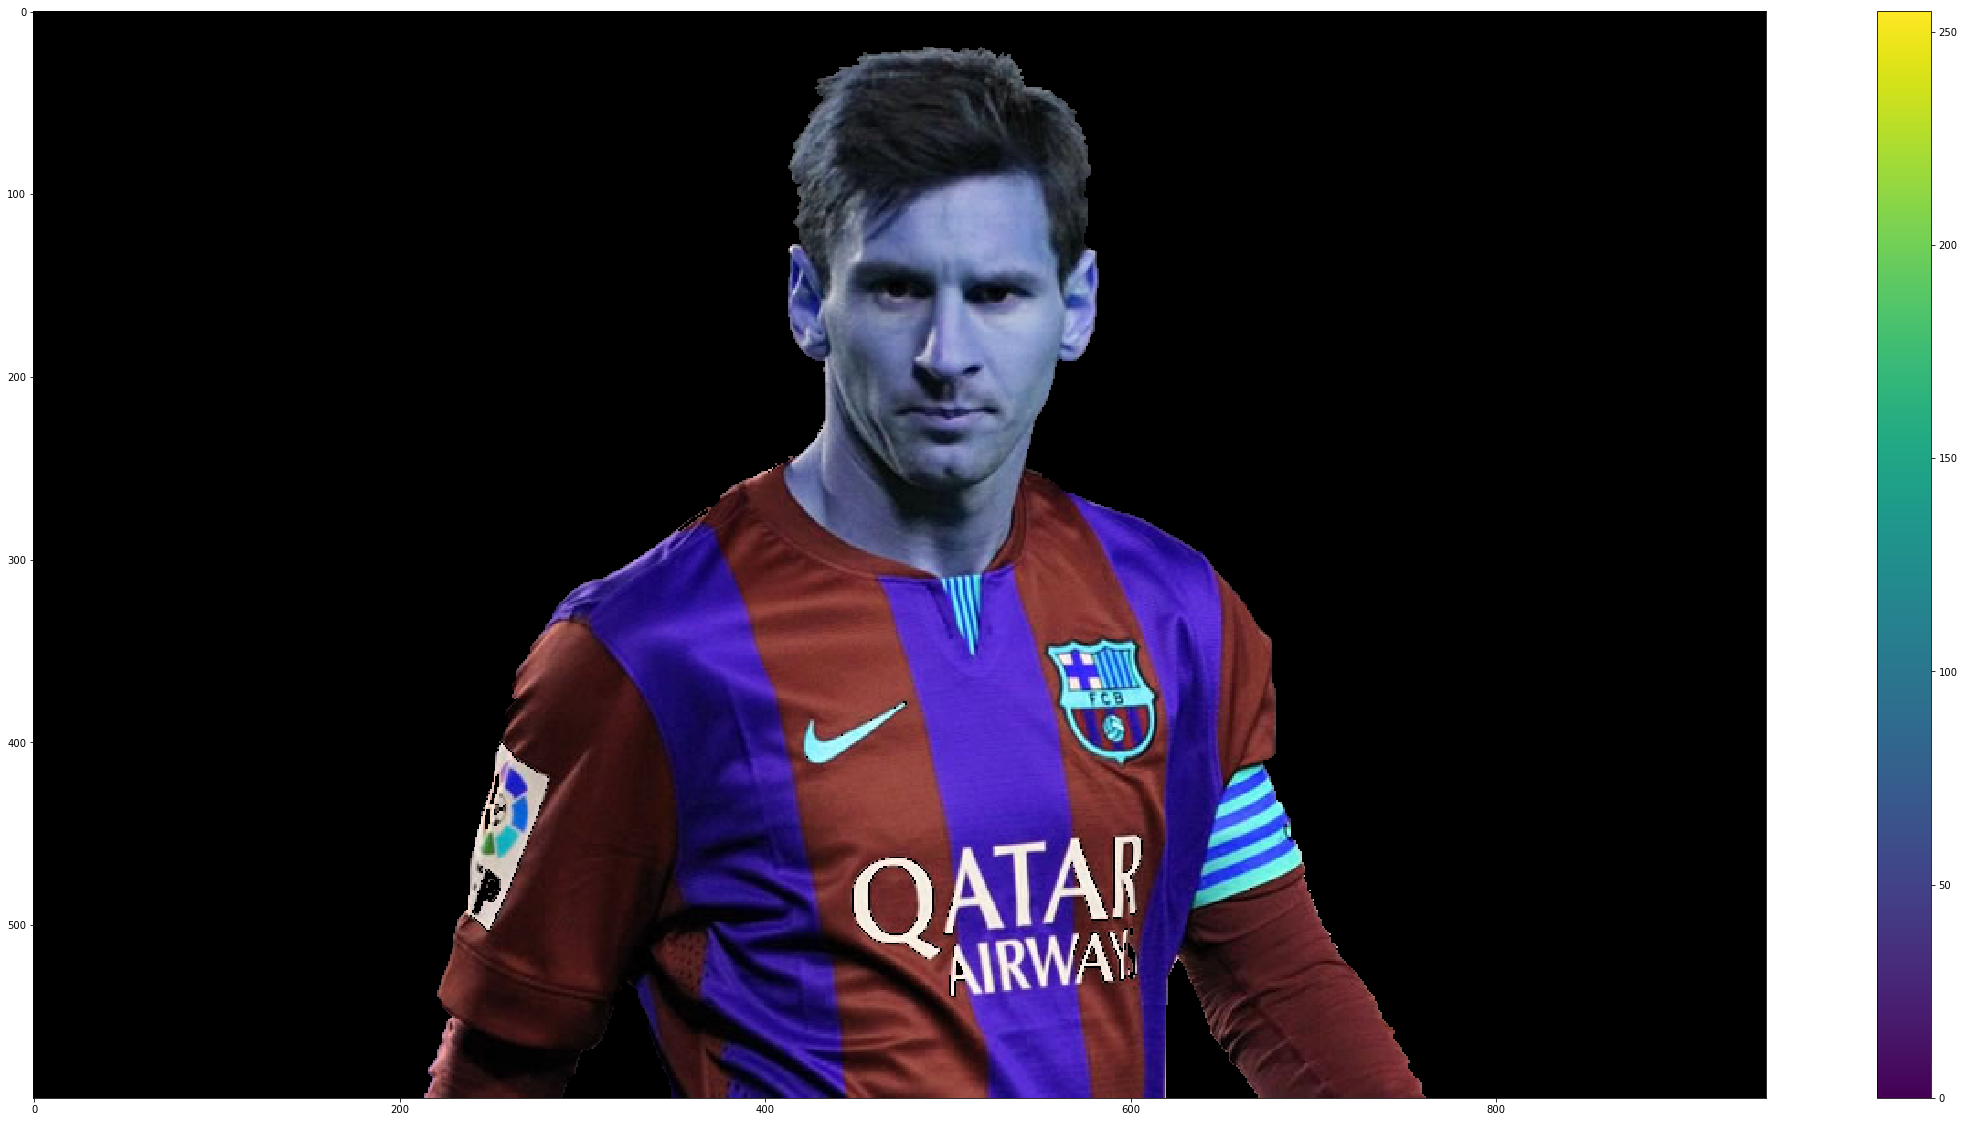

In [6]:
#newmask is the image I manually labelled (in the defected area)
newmask = cv2.imread("80.jpg" , 0) #only one channel of the colored image is loaded

#whereever it is marked white(by us) (sure foreground), change mask=1
#whereevr it is marked black (sure background) , change mask = 0
# We are making all the changes in the mask we created for the extraction earlier
#We are mainly rectifying the places where grabCut distinguished wrong
# Although we can create mask , fgdModel , bgdModel , everything all over again
mask[newmask == 0] = 0  
mask[newmask == 255] = 1

cv2.grabCut(img , mask , None , bgdModel , fgdModel , 5 , cv2.GC_INIT_WITH_MASK ) 
# "None" is given,as we arent following any rectangle approach here like earlier

#again performing same thing 
mask = np.where((mask == 2) | (mask == 0) , 0 , 1).astype("uint8") 
img = img*mask[: , : , np.newaxis]

#To display a bigger figure in the inline output
width = 40
height = 20
plt.figure(figsize=(width, height))

plt.imshow(img)
plt.colorbar()
plt.show()

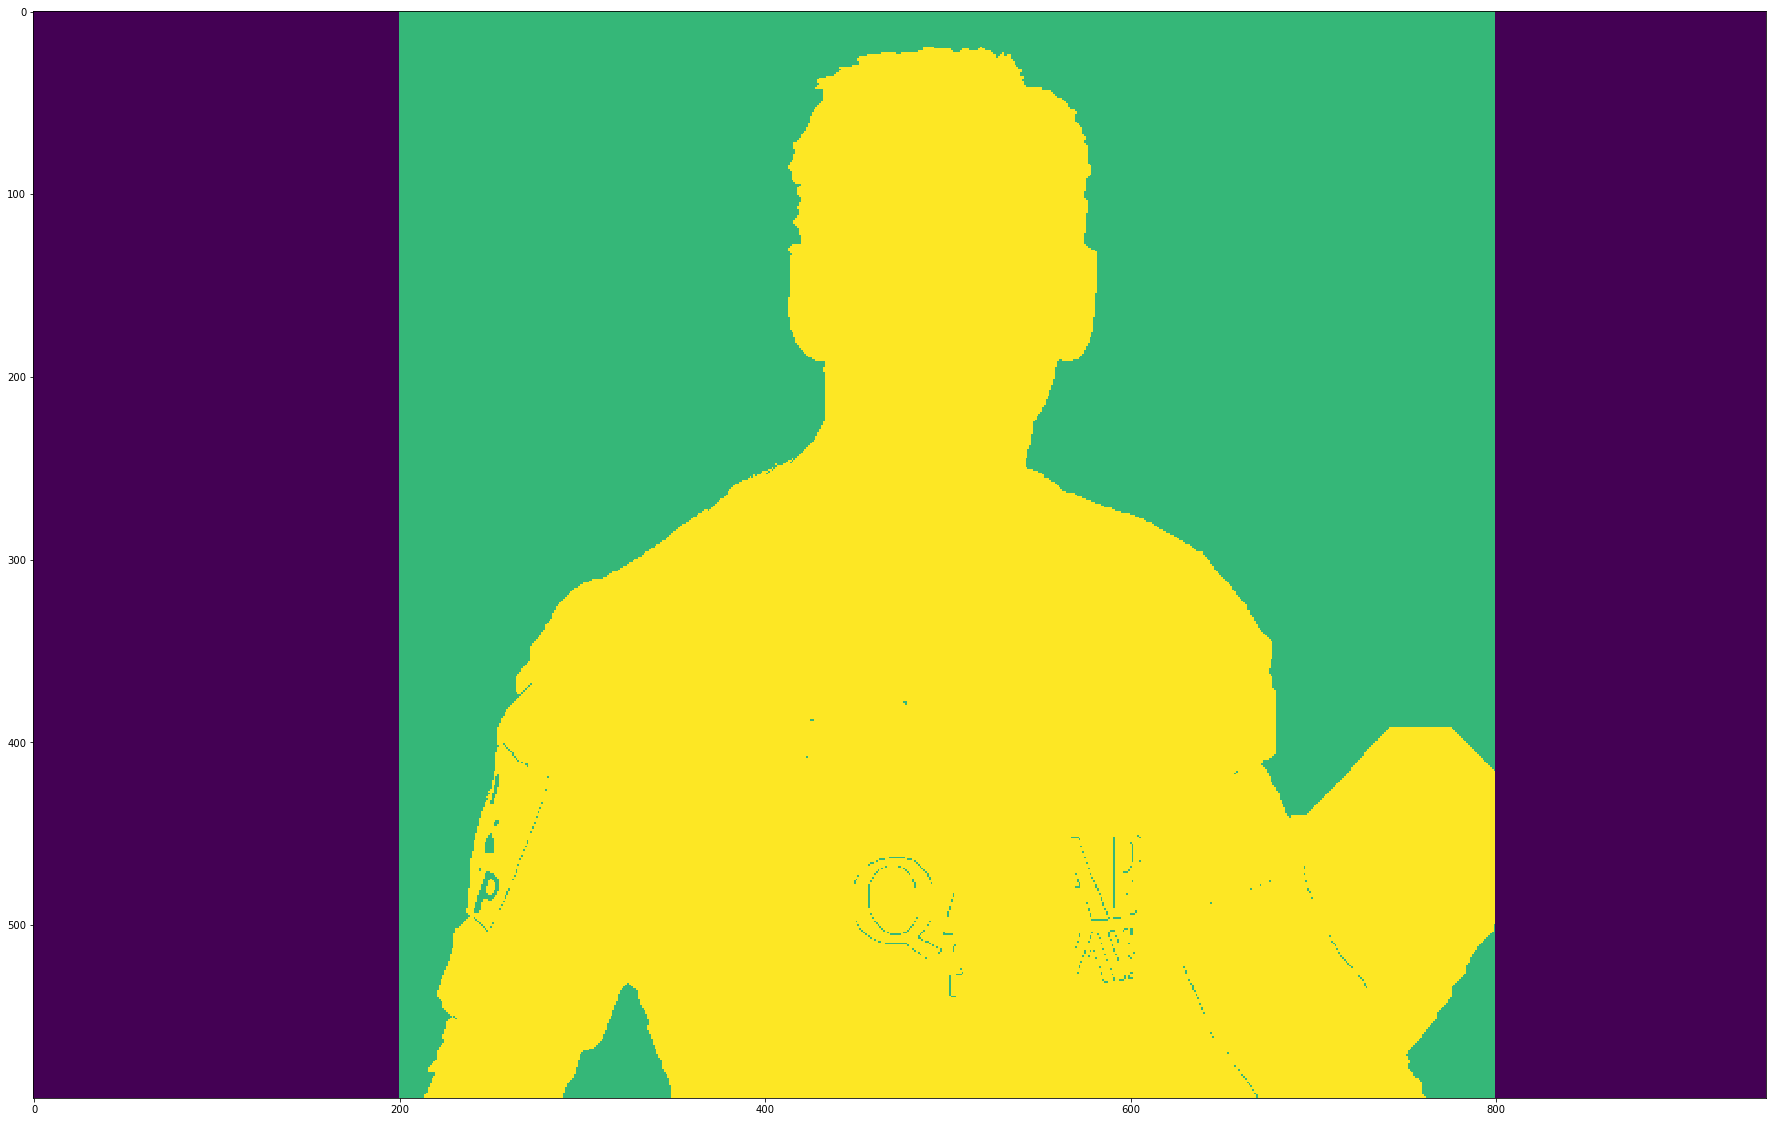

In [10]:
#DISPLAYING THE MASK2 CREATED IN-BETWEEN CODE (FOR BETTER VISUALIZATION OF THE CONCEPT ONLY)

#To display a bigger figure in the inline output
width = 40
height = 20
plt.figure(figsize=(width, height))

plt.imshow(mask)